# Análisis Exploratorio de Datos - Riesgo Crediticio
## Proyecto: Predicción de Riesgo Crediticio
### 1. Importación de librerías y configuración inicial

In [1]:
# 1. Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Añadir el directorio raíz del proyecto al path para poder importar config.py
sys.path.append(str(Path.cwd().parent))

# Importar configuración del proyecto
from src import config

# Configuración de estilo para gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

# Diccionario para traducir nombres de columnas a español
nombres_espanol = {
    'checking_status': 'estado_cuenta',
    'duration': 'duracion_meses',
    'credit_history': 'historial_credito',
    'purpose': 'proposito',
    'credit_amount': 'monto_credito',
    'savings_status': 'estado_ahorros',
    'employment': 'empleo_anyos',
    'installment_rate': 'tasa_cuota',
    'personal_status': 'estado_personal',
    'other_parties': 'otros_deudores',
    'residence_since': 'residencia_desde',
    'property_magnitude': 'tipo_propiedad',
    'age': 'edad',
    'other_payment_plans': 'otros_planes_pago',
    'housing': 'vivienda',
    'existing_credits': 'creditos_existentes',
    'job': 'tipo_empleo',
    'num_dependents': 'num_dependientes',
    'own_telephone': 'telefono_propio',
    'foreign_worker': 'trabajador_extranjero',
    'class': 'clase'
}


### Descripción de las variables del proyecto (Riesgo Crediticio)
Variables predictoras (20):
estado_cuenta (checking_status): Estado de la cuenta corriente.

A11: < 0 DM

A12: 0 ≤ ... < 200 DM

A13: ... ≥ 200 DM / salario por meses durante al menos 1 año

A14: sin cuenta corriente

duracion_meses (duration): Duración del crédito en meses.

historial_credito (credit_history): Historial crediticio.

A30: no hay créditos tomados / todos los créditos pagados debidamente

A31: todos los créditos en este banco pagados debidamente

A32: créditos existentes pagados debidamente hasta ahora

A33: retraso en el pago en el pasado

A34: cuenta crítica / otros créditos existentes (no en este banco)

proposito (purpose): Propósito del crédito.

A40: auto (nuevo)

A41: auto (usado)

A42: muebles/equipo

A43: radio/televisión

A44: electrodomésticos

A45: reparaciones

A46: educación

A47: vacaciones

A48: reentrenamiento

A49: negocios

A410: otros

monto_credito (credit_amount): Monto del crédito solicitado.

estado_ahorros (savings_status): Estado de la libreta de ahorros / valores.

A61: ... < 100 DM

A62: 100 ≤ ... < 500 DM

A63: 500 ≤ ... < 1000 DM

A64: ... ≥ 1000 DM

A65: desconocido / sin cuenta de ahorros

empleo_anyos (employment): Tiempo en el empleo actual.

A71: desempleado

A72: < 1 año

A73: 1 ≤ ... < 4 años

A74: 4 ≤ ... < 7 años

A75: ≥ 7 años

tasa_cuota (installment_rate): Tasa de la cuota como porcentaje de los ingresos disponibles.

estado_personal (personal_status): Estado civil y sexo.

A91: hombre / divorciado

A92: mujer / divorciada / casada

A93: hombre / soltero

A94: hombre / casado / viudo

A95: mujer / soltera

otros_deudores (other_parties): Otros deudores / fiadores.

A101: ninguno

A102: co-solicitante

A103: fiador

residencia_desde (residence_since): Tiempo viviendo en la residencia actual (años).

tipo_propiedad (property_magnitude): Propiedad más valiosa.

A121: bienes raíces

A122: seguro de vida o de propiedad (no del auto)

A123: auto u otros

A124: desconocido / sin propiedad

edad (age): Edad en años.

otros_planes_pago (other_payment_plans): Otros planes de pago a plazos.

A141: banco

A142: tiendas

A143: ninguno

vivienda (housing): Tipo de vivienda.

A151: alquiler

A152: propia

A153: gratis

creditos_existentes (existing_credits): Número de créditos existentes en este banco.

tipo_empleo (job): Categoría laboral.

A171: desempleado / no calificado - no residente

A172: no calificado - residente

A173: empleado / calificado - funcionario

A174: directivo / autónomo / empleado de alta dirección

num_dependientes (num_dependents): Número de personas a cargo.

telefono_propio (own_telephone): ¿Tiene teléfono a su nombre?

A191: ninguno

A192: sí, registrado a su nombre

trabajador_extranjero (foreign_worker): ¿Es trabajador extranjero?

A201: sí

A202: no

Variable objetivo:
clase (class): Clasificación del cliente.

1 = Bueno (cliente confiable, se le concedería el crédito)

2 = Malo (cliente con riesgo, se le denegaría el crédito)

### 2. Carga de datos

In [2]:
# Cargar datos procesados (german_credit.csv)
# Nota: en config, la variable RAW_DATA_FILE apunta al archivo procesado
df = pd.read_csv(config.RAW_DATA_FILE)

# Renombrar columnas a español
df.rename(columns=nombres_espanol, inplace=True)

print(f"Datos cargados: {df.shape[0]} filas, {df.shape[1]} columnas")
df.head()

Datos cargados: 1000 filas, 21 columnas


,estado_cuenta,duracion_meses,historial_credito,proposito,monto_credito,estado_ahorros,empleo_anyos,tasa_cuota,estado_personal,otros_deudores,...,tipo_propiedad,edad,otros_planes_pago,vivienda,creditos_existentes,tipo_empleo,num_dependientes,telefono_propio,trabajador_extranjero,clase
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


### 3. Información general del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   estado_cuenta          1000 non-null   object
 1   duracion_meses         1000 non-null   int64 
 2   historial_credito      1000 non-null   object
 3   proposito              1000 non-null   object
 4   monto_credito          1000 non-null   int64 
 5   estado_ahorros         1000 non-null   object
 6   empleo_anyos           1000 non-null   object
 7   tasa_cuota             1000 non-null   int64 
 8   estado_personal        1000 non-null   object
 9   otros_deudores         1000 non-null   object
 10  residencia_desde       1000 non-null   int64 
 11  tipo_propiedad         1000 non-null   object
 12  edad                   1000 non-null   int64 
 13  otros_planes_pago      1000 non-null   object
 14  vivienda               1000 non-null   object
 15  creditos_existentes   

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duracion_meses,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
monto_credito,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
tasa_cuota,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
residencia_desde,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
edad,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
creditos_existentes,1000.0,1.407,0.577654,1.0,1.0,1.0,2.00,4.0
num_dependientes,1000.0,1.155,0.362086,1.0,1.0,1.0,1.00,2.0
clase,1000.0,1.300,0.458487,1.0,1.0,1.0,2.00,2.0


### 4. Verificación de valores nulos

In [5]:
print("Valores nulos por columna:")
print(df.isnull().sum())

Valores nulos por columna:
estado_cuenta            0
duracion_meses           0
historial_credito        0
proposito                0
monto_credito            0
estado_ahorros           0
empleo_anyos             0
tasa_cuota               0
estado_personal          0
otros_deudores           0
residencia_desde         0
tipo_propiedad           0
edad                     0
otros_planes_pago        0
vivienda                 0
creditos_existentes      0
tipo_empleo              0
num_dependientes         0
telefono_propio          0
trabajador_extranjero    0
clase                    0
dtype: int64


### 5. Distribución de la variable objetivo `clase`

Distribución de la variable 'clase':
clase
1    700
2    300
Name: count, dtype: int64

Proporción:
clase
1    0.7
2    0.3
Name: proportion, dtype: float64


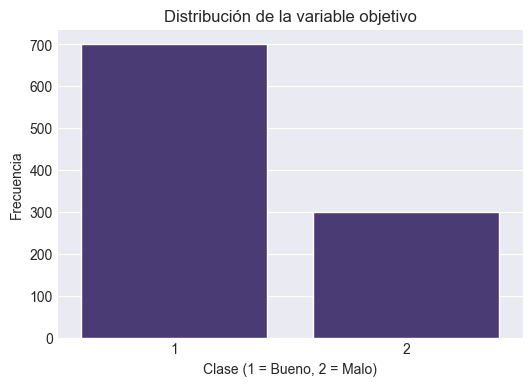

In [6]:
print("Distribución de la variable 'clase':")
print(df['clase'].value_counts())
print("\nProporción:")
print(df['clase'].value_counts(normalize=True).round(3))

plt.figure(figsize=(6,4))
sns.countplot(x='clase', data=df)
plt.title('Distribución de la variable objetivo')
plt.xlabel('Clase (1 = Bueno, 2 = Malo)')
plt.ylabel('Frecuencia')
plt.show()

### 6. Análisis de variables numéricas

Variables numéricas: ['duracion_meses', 'monto_credito', 'tasa_cuota', 'residencia_desde', 'edad', 'creditos_existentes', 'num_dependientes']


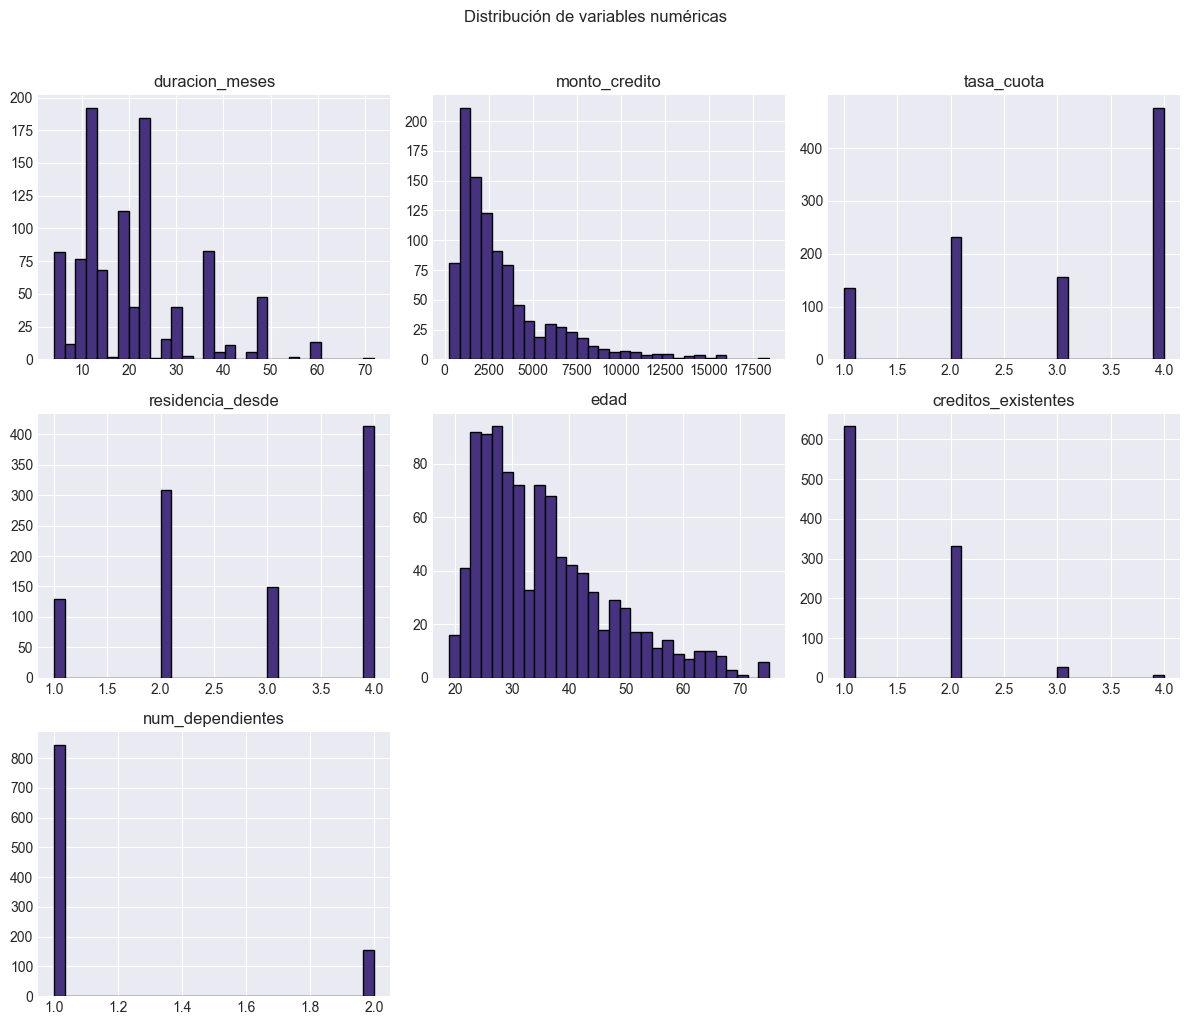

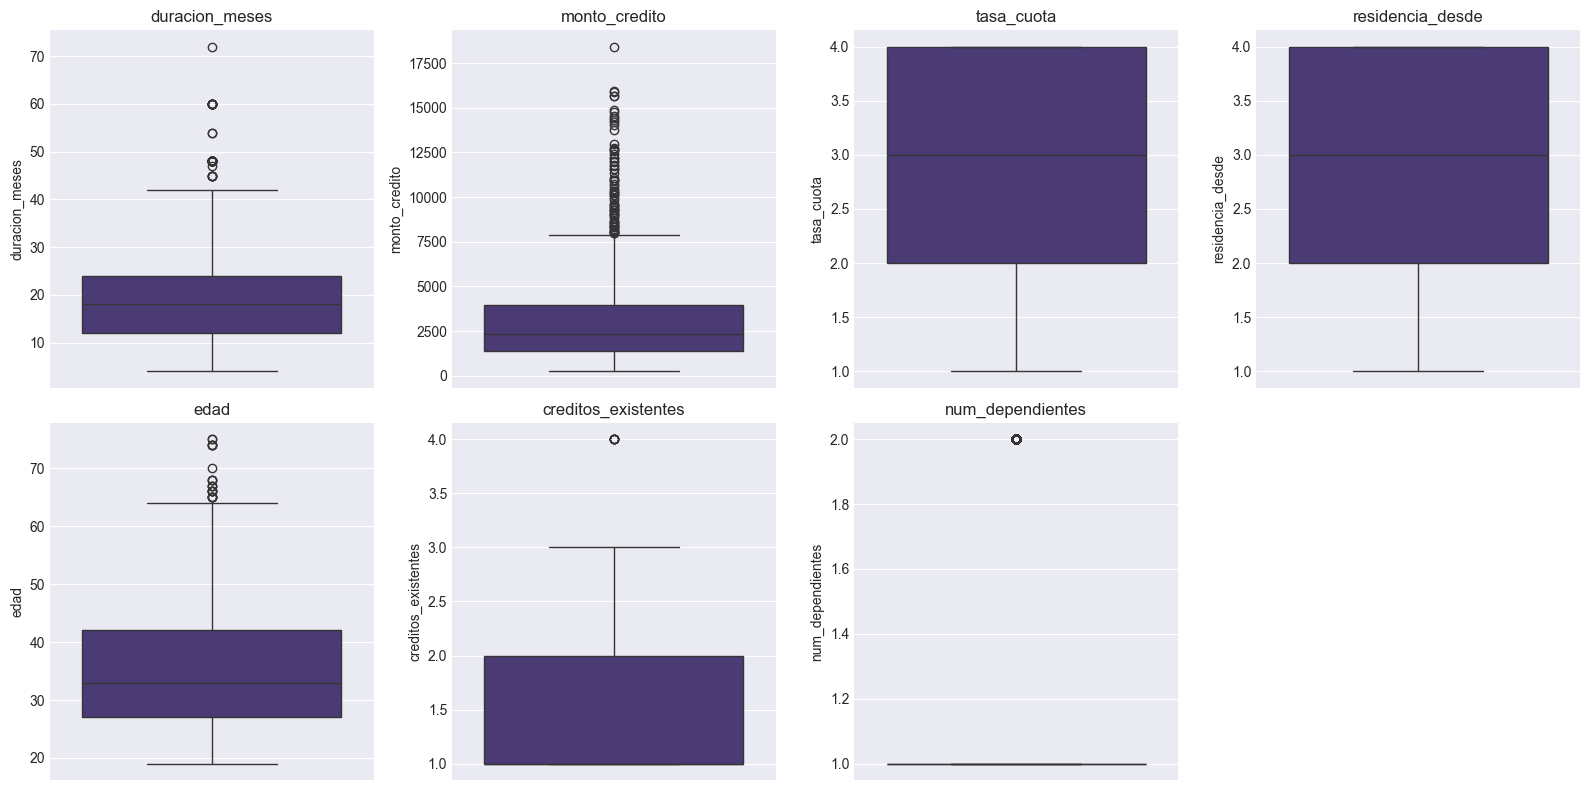

In [7]:
# Usamos las listas de columnas numéricas y categóricas de config,
# pero traducimos los nombres para seleccionar del DataFrame
num_cols_original = config.NUMERICAL_COLUMNS
num_cols_espanol = [nombres_espanol[col] for col in num_cols_original]

print("Variables numéricas:", num_cols_espanol)

# Histogramas
df[num_cols_espanol].hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle('Distribución de variables numéricas', y=1.02)
plt.tight_layout()
plt.show()

# Boxplots para detectar outliers
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(num_cols_espanol):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Eliminar ejes vacíos si hay menos de 8 variables
for j in range(len(num_cols_espanol), 8):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 6.1 Scatterplot de variables numéricas más correlacionadas

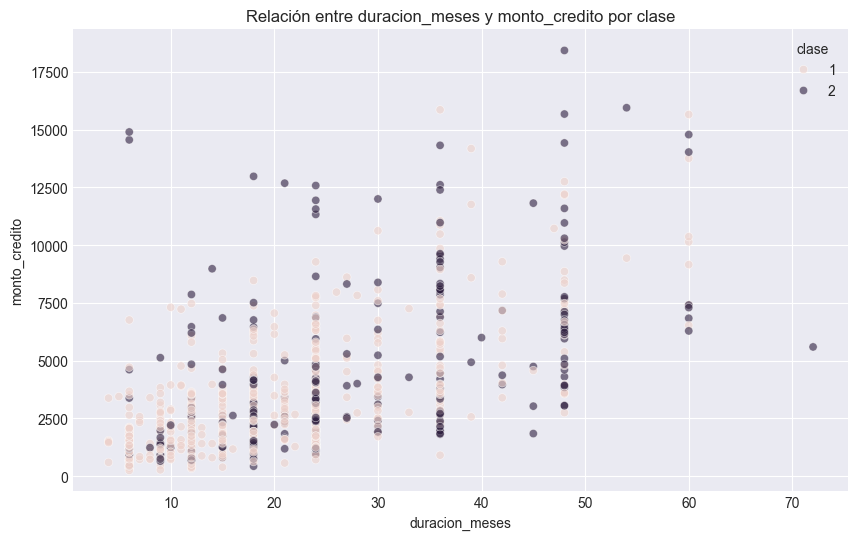

In [10]:
# Identificar las 2 variables numéricas con mayor correlación con 'clase'
corr_with_target = df.corr(numeric_only=True)['clase'].abs().sort_values(ascending=False)

top_corr = corr_with_target.iloc[1:3].index.tolist()  # excluimos la propia 'clase'

if len(top_corr) >= 2:
    plt.figure(figsize=(10,6))
    sns.scatterplot(
        x=top_corr[0],
        y=top_corr[1],
        hue='clase',
        data=df,
        alpha=0.6
    )
    plt.title(f'Relación entre {top_corr[0]} y {top_corr[1]} por clase')
    plt.show()


### 6.2 Histograma 2D para variables categóricas vs clase

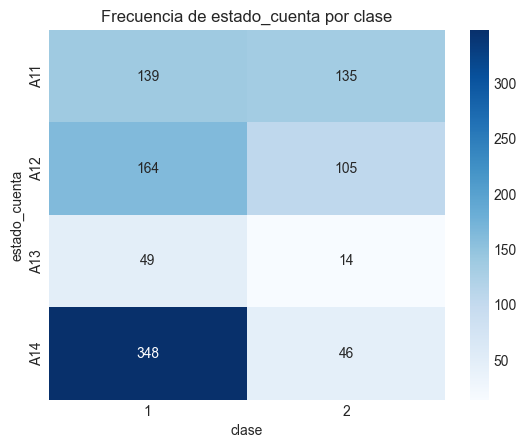

In [11]:
# Crear una tabla de frecuencias cruzadas y graficar como heatmap
crosstab = pd.crosstab(df['estado_cuenta'], df['clase'])
sns.heatmap(crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Frecuencia de estado_cuenta por clase')
plt.show()

### 6.3 Análisis de outliers más detallado

In [12]:
for col in num_cols_espanol:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.2f}%)")

duracion_meses: 70 outliers (7.00%)
monto_credito: 72 outliers (7.20%)
tasa_cuota: 0 outliers (0.00%)
residencia_desde: 0 outliers (0.00%)
edad: 23 outliers (2.30%)
creditos_existentes: 6 outliers (0.60%)
num_dependientes: 155 outliers (15.50%)


### 7. Relación de variables numéricas con la clase objetivo

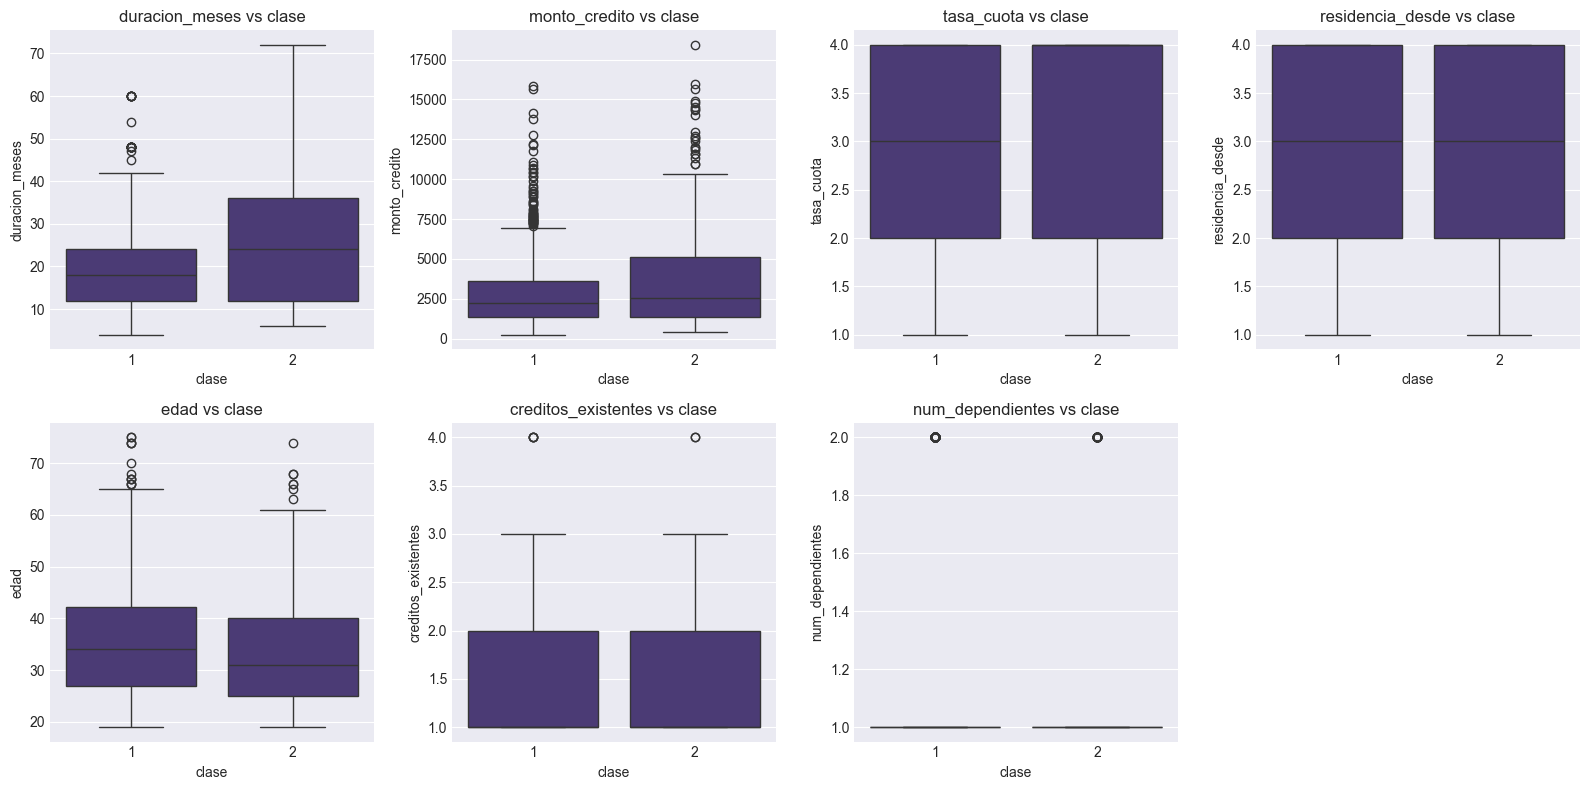

In [13]:
# Boxplots por clase
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(num_cols_espanol):
    sns.boxplot(x='clase', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs clase')

for j in range(len(num_cols_espanol), 8):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
# Estadísticos descriptivos por clase
df.groupby('clase')[num_cols_espanol].describe().transpose()

clase                                 1             2
duracion_meses      count    700.000000    300.000000
                    mean      19.207143     24.860000
                    std       11.079564     13.282639
                    min        4.000000      6.000000
                    25%       12.000000     12.000000
                    50%       18.000000     24.000000
                    75%       24.000000     36.000000
                    max       60.000000     72.000000
monto_credito       count    700.000000    300.000000
                    mean    2985.457143   3938.126667
                    std     2401.472278   3535.818955
                    min      250.000000    433.000000
                    25%     1375.500000   1352.500000
                    50%     2244.000000   2574.500000
                    75%     3634.750000   5141.500000
                    max    15857.000000  18424.000000
tasa_cuota          count    700.000000    300.000000
                    mean       2.920000      3.096667
                    std        1.128078      1.088395
                    min        1.000000      1.000000
                    25%        2.000000      2.000000
                    50%        3.000000      4.000000
                    75%        4.000000      4.000000
                    max        4.000000      4.000000
residencia_desde    count    700.000000    300.000000
                    mean       2.842857      2.850000
                    std        1.108373      1.094605
                    min        1.000000      1.000000
                    25%        2.000000      2.000000
                    50%        3.000000      3.000000
                    75%        4.000000      4.000000
                    max        4.000000      4.000000
edad                count    700.000000    300.000000
                    mean      36.224286     33.963333
                    std       11.381145     11.222379
                    min       19.000000     19.000000
                    25%       27.000000     25.000000
                    50%       34.000000     31.000000
                    75%       42.250000     40.000000
                    max       75.000000     74.000000
creditos_existentes count    700.000000    300.000000
                    mean       1.424286      1.366667
                    std        0.584721      0.559702
                    min        1.000000      1.000000
                    25%        1.000000      1.000000
                    50%        1.000000      1.000000
                    75%        2.000000      2.000000
                    max        4.000000      4.000000
num_dependientes    count    700.000000    300.000000
                    mean       1.155714      1.153333
                    std        0.362844      0.360911
                    min        1.000000      1.000000
                    25%        1.000000      1.000000
                    50%        1.000000      1.000000
                    75%        1.000000      1.000000
                    max        2.000000      2.000000

### 8. Análisis de variables categóricas

Variables categóricas: ['estado_cuenta', 'historial_credito', 'proposito', 'estado_ahorros', 'empleo_anyos', 'estado_personal', 'otros_deudores', 'tipo_propiedad', 'otros_planes_pago', 'vivienda', 'tipo_empleo', 'telefono_propio', 'trabajador_extranjero']

--- estado_cuenta ---
estado_cuenta
A14    394
A11    274
A12    269
A13     63
Name: count, dtype: int64


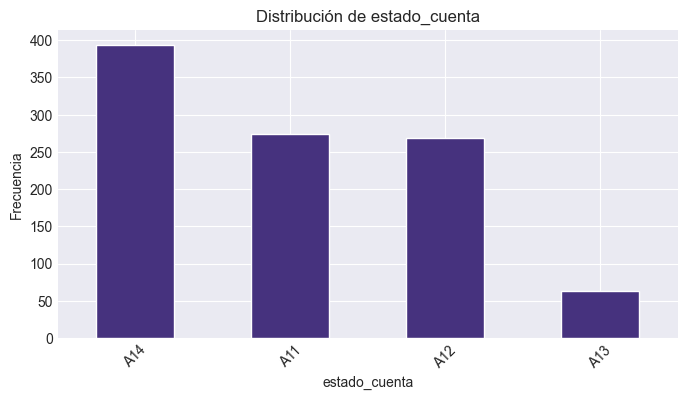


--- historial_credito ---
historial_credito
A32    530
A34    293
A33     88
A31     49
A30     40
Name: count, dtype: int64


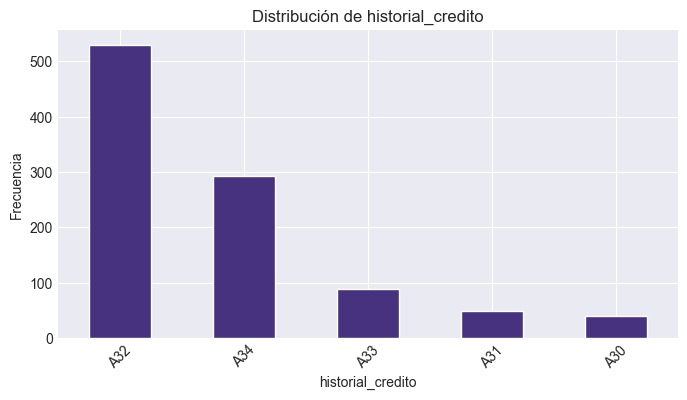


--- proposito ---
proposito
A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A44      12
A410     12
A48       9
Name: count, dtype: int64


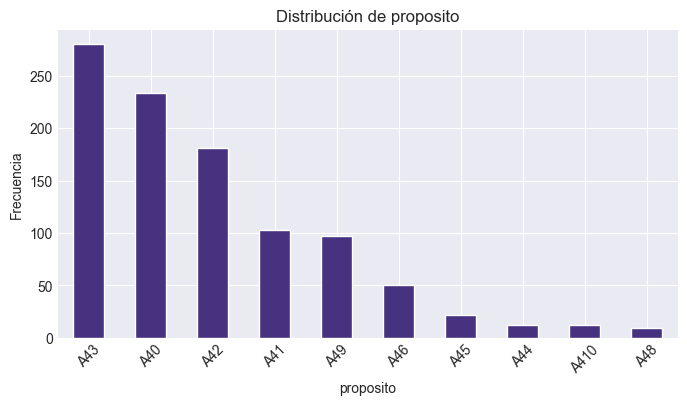


--- estado_ahorros ---
estado_ahorros
A61    603
A65    183
A62    103
A63     63
A64     48
Name: count, dtype: int64


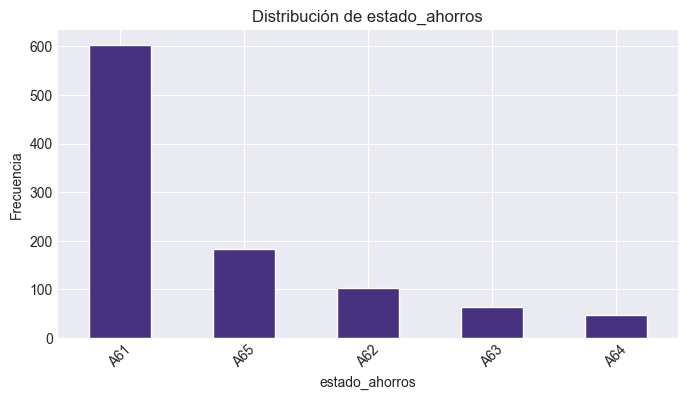


--- empleo_anyos ---
empleo_anyos
A73    339
A75    253
A74    174
A72    172
A71     62
Name: count, dtype: int64


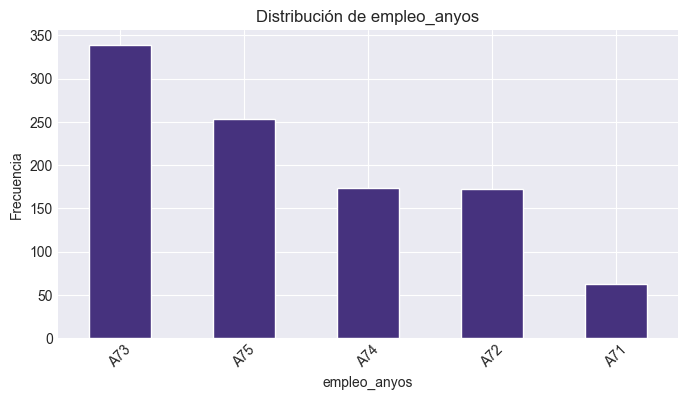


--- estado_personal ---
estado_personal
A93    548
A92    310
A94     92
A91     50
Name: count, dtype: int64


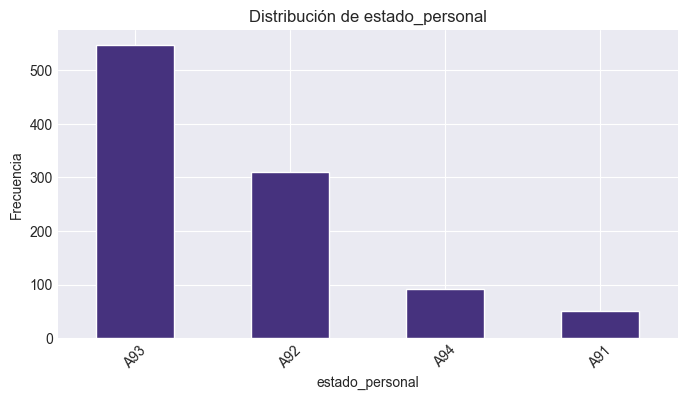


--- otros_deudores ---
otros_deudores
A101    907
A103     52
A102     41
Name: count, dtype: int64


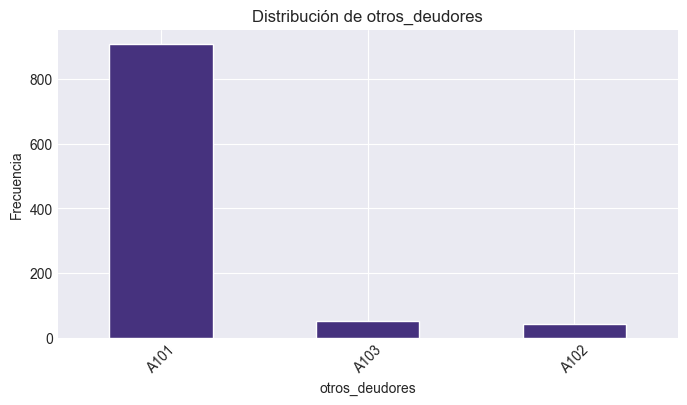


--- tipo_propiedad ---
tipo_propiedad
A123    332
A121    282
A122    232
A124    154
Name: count, dtype: int64


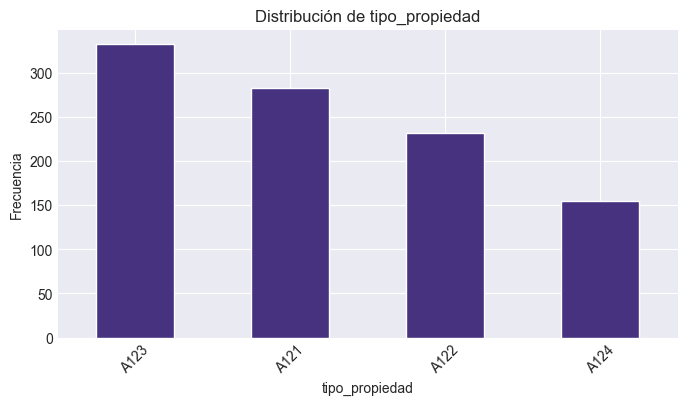


--- otros_planes_pago ---
otros_planes_pago
A143    814
A141    139
A142     47
Name: count, dtype: int64


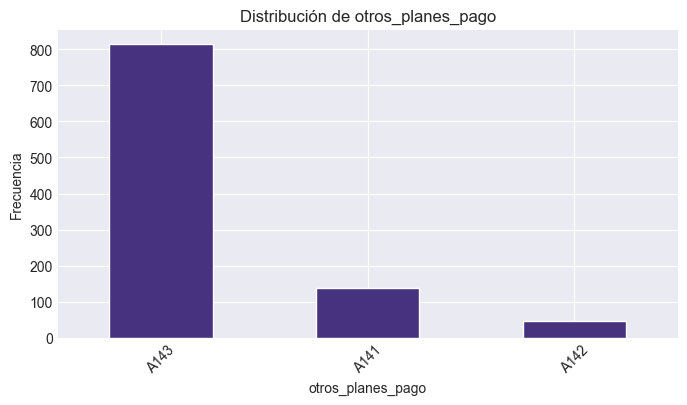


--- vivienda ---
vivienda
A152    713
A151    179
A153    108
Name: count, dtype: int64


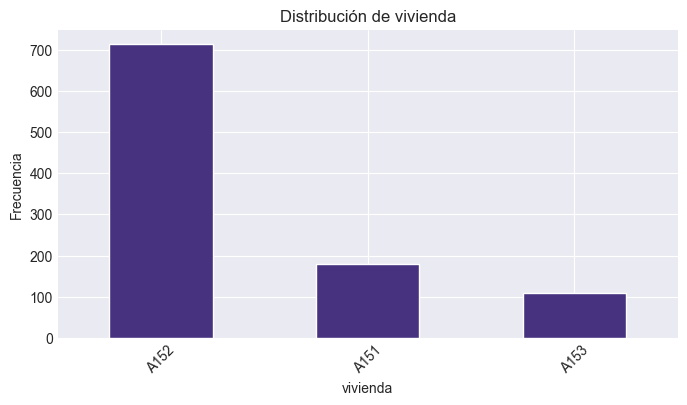


--- tipo_empleo ---
tipo_empleo
A173    630
A172    200
A174    148
A171     22
Name: count, dtype: int64


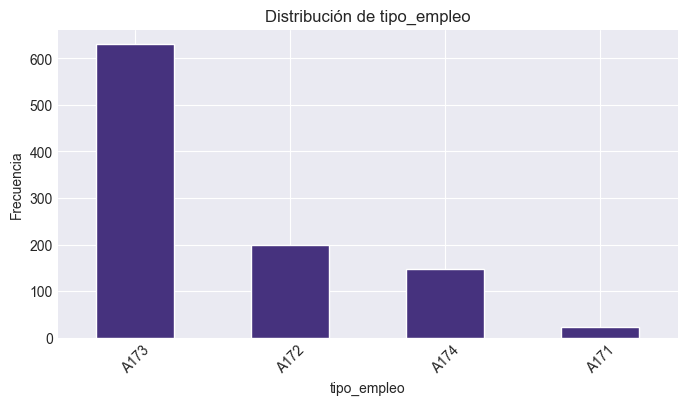


--- telefono_propio ---
telefono_propio
A191    596
A192    404
Name: count, dtype: int64


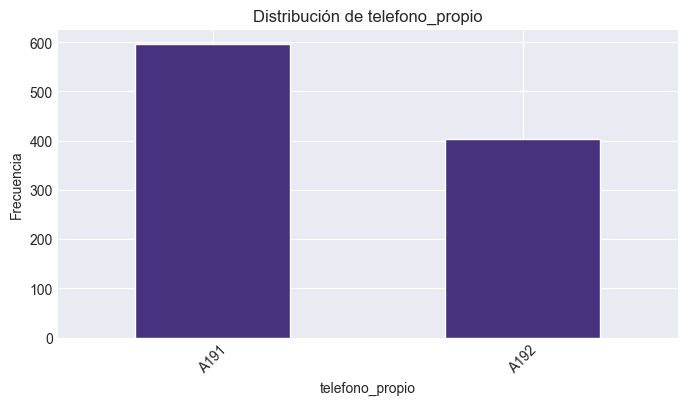


--- trabajador_extranjero ---
trabajador_extranjero
A201    963
A202     37
Name: count, dtype: int64


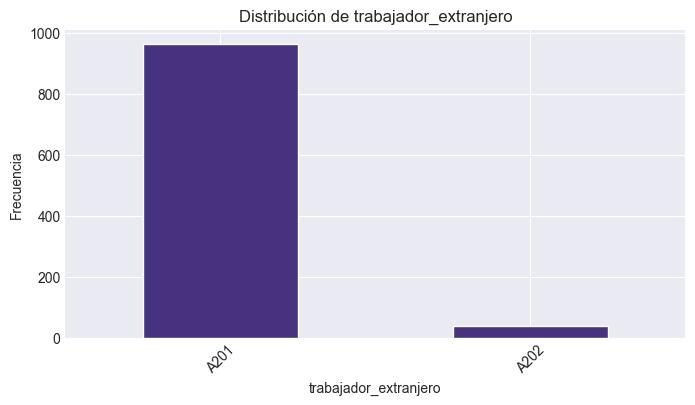

In [15]:
cat_cols_original = config.CATEGORICAL_COLUMNS
cat_cols_espanol = [nombres_espanol[col] for col in cat_cols_original]

print("Variables categóricas:", cat_cols_espanol)

# Frecuencias y gráficos de barras
for col in cat_cols_espanol:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())

    plt.figure(figsize=(8,4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

### 9. Relación de variables categóricas con la clase objetivo


--- estado_cuenta vs clase ---
clase              1      2
estado_cuenta              
A11            0.507  0.493
A12            0.610  0.390
A13            0.778  0.222
A14            0.883  0.117


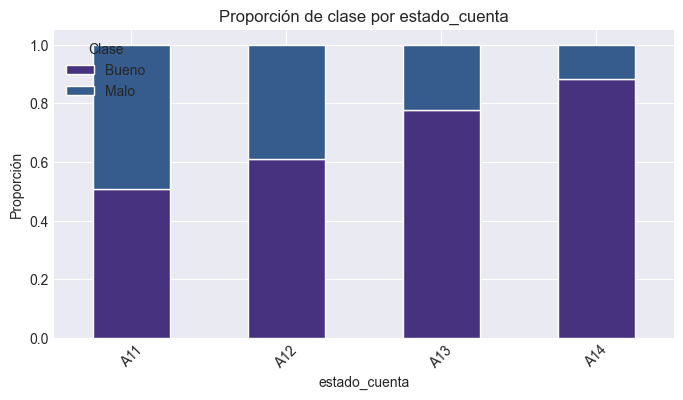


--- historial_credito vs clase ---
clase                  1      2
historial_credito              
A30                0.375  0.625
A31                0.429  0.571
A32                0.681  0.319
A33                0.682  0.318
A34                0.829  0.171


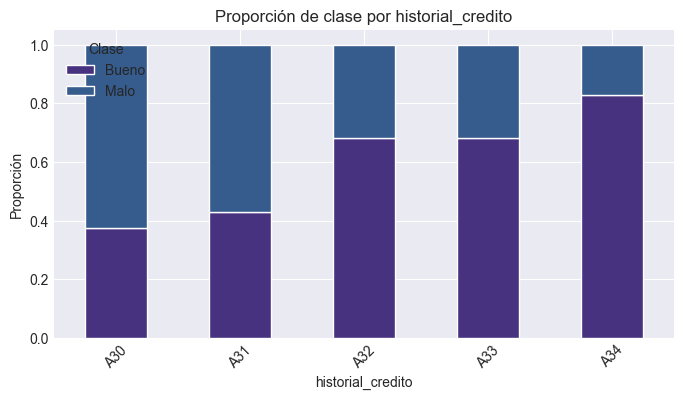


--- proposito vs clase ---
clase          1      2
proposito              
A40        0.620  0.380
A41        0.835  0.165
A410       0.583  0.417
A42        0.680  0.320
A43        0.779  0.221
A44        0.667  0.333
A45        0.636  0.364
A46        0.560  0.440
A48        0.889  0.111
A49        0.649  0.351


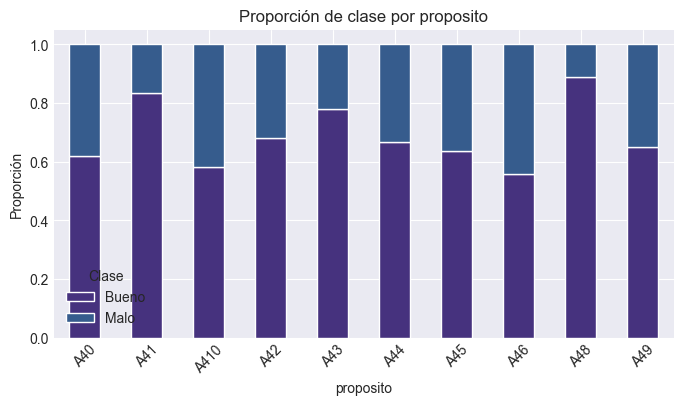


--- estado_ahorros vs clase ---
clase               1      2
estado_ahorros              
A61             0.640  0.360
A62             0.670  0.330
A63             0.825  0.175
A64             0.875  0.125
A65             0.825  0.175


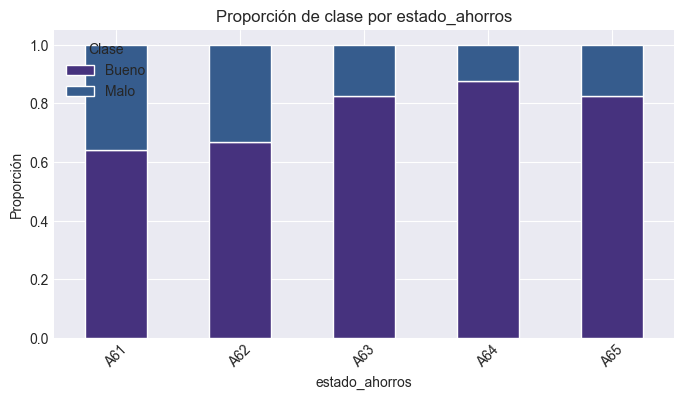


--- empleo_anyos vs clase ---
clase             1      2
empleo_anyos              
A71           0.629  0.371
A72           0.593  0.407
A73           0.693  0.307
A74           0.776  0.224
A75           0.747  0.253


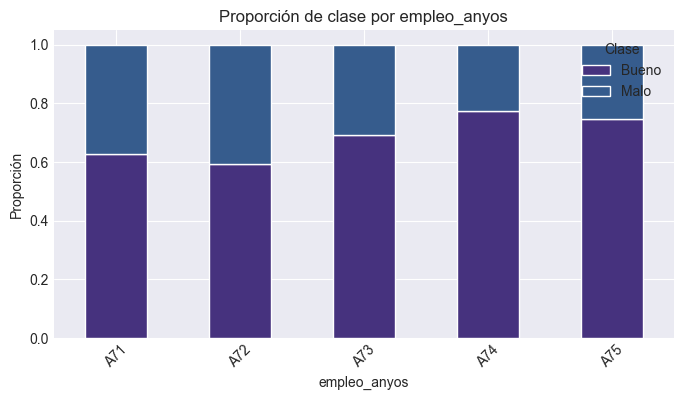


--- estado_personal vs clase ---
clase                1      2
estado_personal              
A91              0.600  0.400
A92              0.648  0.352
A93              0.734  0.266
A94              0.728  0.272


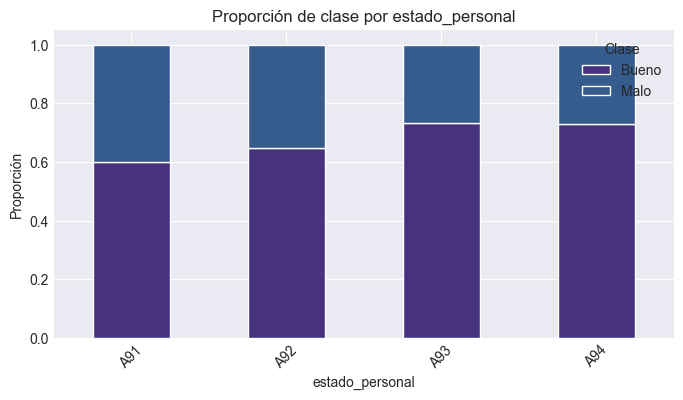


--- otros_deudores vs clase ---
clase               1      2
otros_deudores              
A101            0.700  0.300
A102            0.561  0.439
A103            0.808  0.192


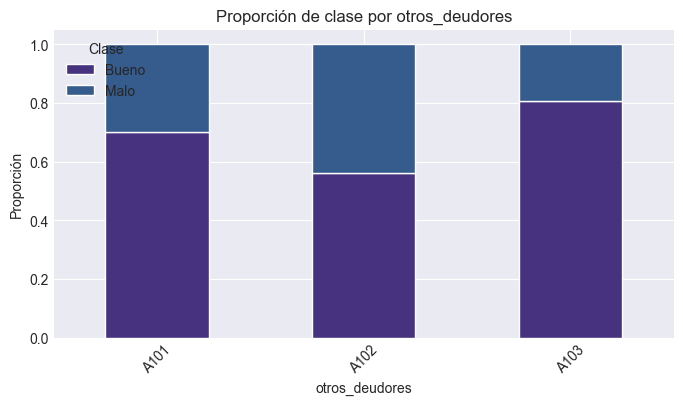


--- tipo_propiedad vs clase ---
clase               1      2
tipo_propiedad              
A121            0.787  0.213
A122            0.694  0.306
A123            0.693  0.307
A124            0.565  0.435


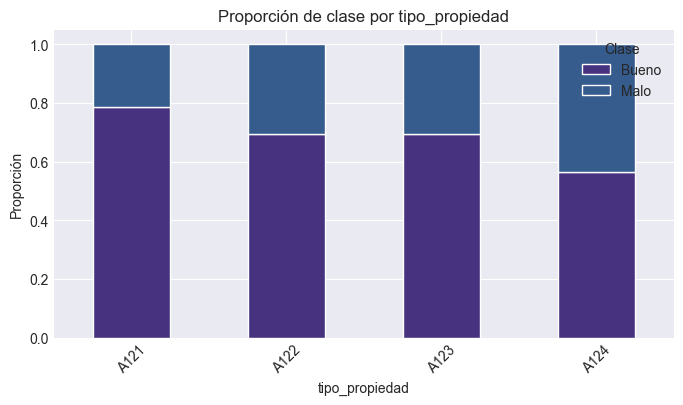


--- otros_planes_pago vs clase ---
clase                  1      2
otros_planes_pago              
A141               0.590  0.410
A142               0.596  0.404
A143               0.725  0.275


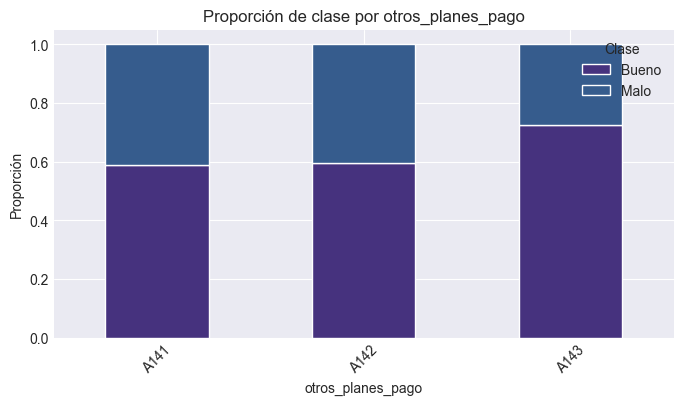


--- vivienda vs clase ---
clase         1      2
vivienda              
A151      0.609  0.391
A152      0.739  0.261
A153      0.593  0.407


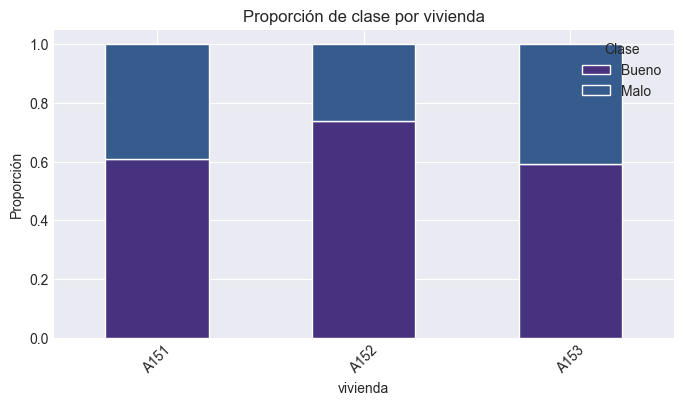


--- tipo_empleo vs clase ---
clase            1      2
tipo_empleo              
A171         0.682  0.318
A172         0.720  0.280
A173         0.705  0.295
A174         0.655  0.345


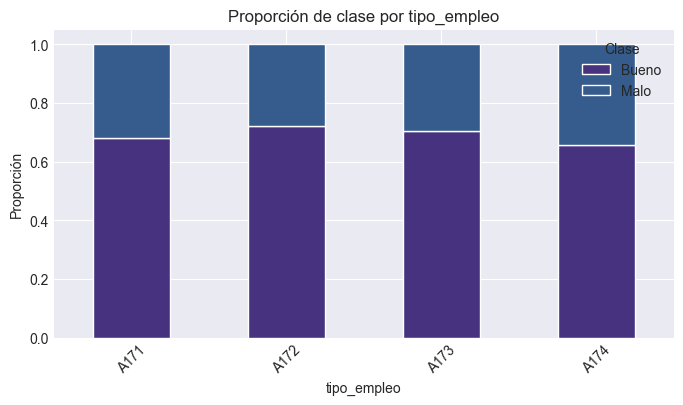


--- telefono_propio vs clase ---
clase                1      2
telefono_propio              
A191             0.686  0.314
A192             0.720  0.280


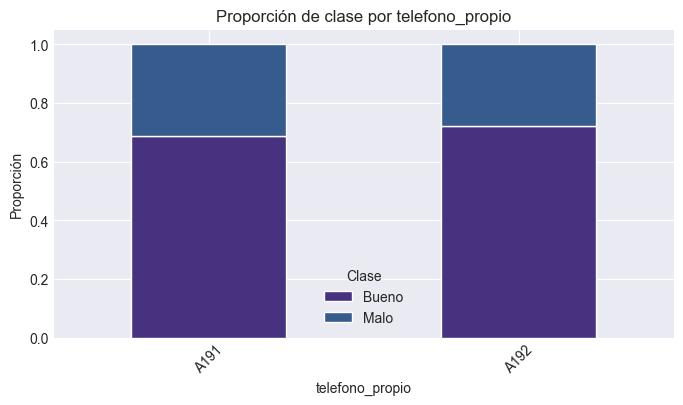


--- trabajador_extranjero vs clase ---
clase                      1      2
trabajador_extranjero              
A201                   0.693  0.307
A202                   0.892  0.108


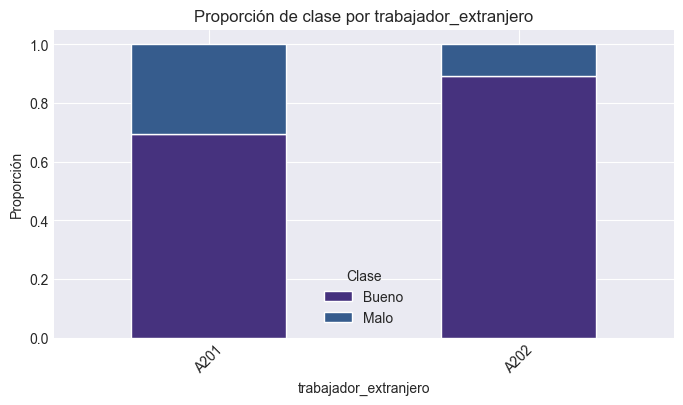

In [16]:
# Tablas de contingencia y gráficos apilados
for col in cat_cols_espanol:
    print(f"\n--- {col} vs clase ---")
    crosstab = pd.crosstab(df[col], df['clase'], normalize='index')
    print(crosstab.round(3))

    crosstab.plot(kind='bar', stacked=True, figsize=(8,4))
    plt.title(f'Proporción de clase por {col}')
    plt.xlabel(col)
    plt.ylabel('Proporción')
    plt.legend(title='Clase', labels=['Bueno', 'Malo'])
    plt.xticks(rotation=45)
    plt.show()

### 10. Matriz de correlación (variables numéricas)

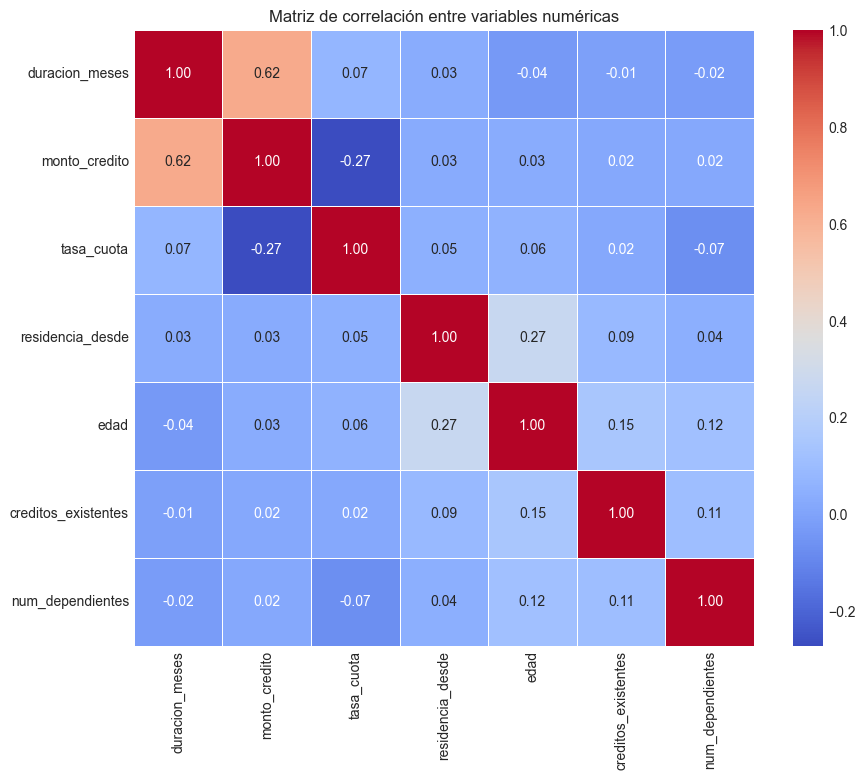

In [17]:
plt.figure(figsize=(10, 8))
corr_matrix = df[num_cols_espanol].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

In [18]:
# Correlación con la variable objetivo
corr_with_target = df[num_cols_espanol + ['clase']].corr()['clase'].sort_values(ascending=False)
print("Correlación de variables numéricas con la clase:")
print(corr_with_target)

Correlación de variables numéricas con la clase:
clase                  1.000000
duracion_meses         0.214927
monto_credito          0.154739
tasa_cuota             0.072404
residencia_desde       0.002967
num_dependientes      -0.003015
creditos_existentes   -0.045732
edad                  -0.091127
Name: clase, dtype: float64


### 11. Conclusiones del EDA

**Hallazgos principales:**
- El dataset tiene 1000 registros, 20 variables predictoras y una variable objetivo binaria (1 = bueno, 2 = malo).
- La distribución de clases es 70% buenos y 30% malos → desbalance moderado.
- No hay valores nulos.
- Las variables numéricas como `duracion_meses`, `monto_credito` y `edad` muestran diferencias entre clases.
- Variables categóricas como `estado_cuenta`, `historial_credito` y `proposito` tienen categorías con mayor proporción de malos pagadores.
- Se observan outliers en `monto_credito` y `edad`, que podrían requerir tratamiento.
- La correlación más alta con la clase la tienen `duracion_meses` y `monto_credito` (positiva) y `edad` (negativa).
